# PyTorch basics

https://github.com/Atcold/pytorch-Deep-Learning/blob/master/01-tensor_tutorial.ipynb

In [1]:
import torch

In [2]:
t = torch.Tensor(2, 3, 4)
type(t)

torch.Tensor

In [3]:
t.size()

torch.Size([2, 3, 4])

In [4]:
print('t size:', ' \u00D7 '.join(map(str, t.size())))

t size: 2 × 3 × 4


In [5]:
print(f'point in a {t.numel()} dimensional space')

point in a 24 dimensional space


In [6]:
print(f'organized in {t.dim()} sub-dimensions')

organized in 3 sub-dimensions


In [7]:
t

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00],
         [1.4013e-45, 0.0000e+00,        nan,        nan]],

        [[1.3085e-19, 4.5698e-41, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.4013e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [8]:
# mutates tensor in-place
t.random_(10)

tensor([[[4., 6., 2., 4.],
         [8., 7., 8., 1.],
         [7., 4., 0., 7.]],

        [[9., 3., 5., 6.],
         [5., 9., 8., 4.],
         [4., 5., 3., 9.]]])

In [9]:
# resizes tensor permanently
r = torch.Tensor(t)
r.resize_(3, 8)
r

tensor([[4., 6., 2., 4., 8., 7., 8., 1.],
        [7., 4., 0., 7., 9., 3., 5., 6.],
        [5., 9., 8., 4., 4., 5., 3., 9.]])

In [10]:
r.zero_()

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
t

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [12]:
# but we can avoid this
s = r.clone()

In [13]:
s.fill_(1)
s

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [14]:
r

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

# Vectors (1d tensors)

In [15]:
v = torch.Tensor([1, 2, 3, 4])
v

tensor([1., 2., 3., 4.])

In [17]:
print(f'dim: {v.dim()}, size: {v.size()[0]}')

dim: 1, size: 4


In [18]:
w = torch.Tensor([1, 0, 2, 0])
w

tensor([1., 0., 2., 0.])

In [19]:
# element-wise multiplication
v * w

tensor([1., 0., 6., 0.])

In [20]:
# scalar (inner) product
v @ w

tensor(7.)

In [21]:
# in-place replacement of random numbers
x = torch.Tensor(5).random_(10)
x

tensor([5., 0., 3., 0., 2.])

In [22]:
print(f'first: {x[0]}, last: {x[-1]}')

first: 5.0, last: 2.0


In [23]:
# extract sub-tensor [from:to)
x[1:3]

tensor([0., 3.])

In [24]:
v

tensor([1., 2., 3., 4.])

In [26]:
# create tensor with integers ranging from 1 to 5, excluding 5
v = torch.arange(1, 5)
v

tensor([1, 2, 3, 4])

In [27]:
# square all elements in tensor
print(v.pow(2), v)

tensor([ 1,  4,  9, 16]) tensor([1, 2, 3, 4])


# Matrices (2d tensors)

In [28]:
m = torch.Tensor(
    [[2, 5, 3, 7],
     [4, 2, 1, 9]]
)

m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [29]:
m.dim()

2

In [31]:
print(m.size(0), m.size(1), m.size(), sep=' -- ')

2 -- 4 -- torch.Size([2, 4])


In [32]:
# num elements
m.numel()

8

In [33]:
# row 0, column 2
m[0][2]

tensor(3.)

In [34]:
m[0, 2]

tensor(3.)

In [35]:
# column 1, all rows (size 2)
m[:, 1]

tensor([5., 2.])

In [38]:
# column 1, all rows (size 2x1)
m[:, [1]]

tensor([[5.],
        [2.]])

In [39]:
# row 0, all columns (size 1x4)
m[[0], :]

tensor([[2., 5., 3., 7.]])

In [40]:
# row 0, all columns (size 4)
m[0, :]

tensor([2., 5., 3., 7.])

In [42]:
# tensor of floats
v = torch.arange(1., 5)
v

tensor([1., 2., 3., 4.])

In [43]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [44]:
# scalar product
m @ v

tensor([49., 47.])

In [45]:
# equiv 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [47]:
m[0, :] @ v

tensor(49.)

In [46]:
m[[1], :] @ v

tensor([47.])

In [48]:
# add random tensor of size 2x4 to m
m + torch.rand(2, 4)

tensor([[2.5249, 5.5168, 3.3327, 7.9429],
        [4.5183, 2.6924, 1.1534, 9.9407]])

In [49]:
# multiply by random tensor
m * torch.rand(2, 4)

tensor([[1.1353, 0.0749, 0.8236, 1.5904],
        [3.8513, 1.1459, 0.2577, 5.8638]])

In [50]:
m.size()

torch.Size([2, 4])

In [51]:
# transpose m (2x4 -> 4x2)
m.t()

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

In [53]:
# same as
m.transpose(0, 1)

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])

# Constructors

In [54]:
torch.arange(3., 9)

tensor([3., 4., 5., 6., 7., 8.])

In [55]:
torch.arange(5.7, -2.1, -3)

tensor([ 5.7000,  2.7000, -0.3000])

In [56]:
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [57]:
torch.linspace(3, 8, 20).view(1, -1)

tensor([[3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
         5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
         7.7368, 8.0000]])

In [60]:
torch.linspace(3, 8, 20).view(-1)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

In [61]:
torch.zeros(3, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [62]:
torch.ones(3, 2, 5)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])

In [63]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [64]:
import matplotlib.pyplot as plt

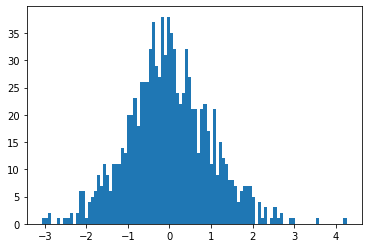

In [65]:
plt.hist(torch.randn(1000).numpy(), 100);

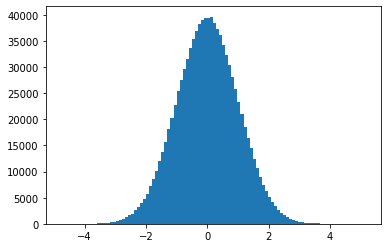

In [66]:
plt.hist(torch.randn(10**6).numpy(), 100);

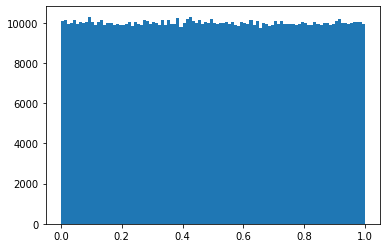

In [67]:
plt.hist(torch.rand(10**6).numpy(), 100);

In [68]:
# helper to get what kind of tensor types
torch.*Tensor?

In [69]:
m

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]])

In [70]:
m_double = m.double()
m_double

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], dtype=torch.float64)

In [71]:
m_byte = m.byte()
m_byte

tensor([[2, 5, 3, 7],
        [4, 2, 1, 9]], dtype=torch.uint8)

In [73]:
# move to gpu device if there is one
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [74]:
m.to(device)

tensor([[2., 5., 3., 7.],
        [4., 2., 1., 9.]], device='cuda:0')

In [75]:
!gpustat

galaxies                 Thu Oct  8 16:11:53 2020  418.67
[0] Tesla P100-PCIE-16GB | 73'C,  89 % |  5722 / 16280 MB | jupyter(5083M) jupyter(629M)


In [76]:
# tensor -> array
m_np = m.numpy()
m_np

array([[2., 5., 3., 7.],
       [4., 2., 1., 9.]], dtype=float32)

In [78]:
import numpy as np
n_np = np.arange(5)
n = torch.from_numpy(n_np)
print(n_np, n, sep='\n')

[0 1 2 3 4]
tensor([0, 1, 2, 3, 4])


In [79]:
# inplace multiplication (note that we *didn't* clone n from n_np, so it affects both)
n.mul_(2)
n_np

array([0, 2, 4, 6, 8])

# More fun

In [80]:
# 1x4
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])
print(a.size(), b)

torch.Size([1, 4]) tensor([[5., 6., 7., 8.]])


In [81]:
# concat along axis 0 -> 2x4
torch.cat((a, b), 0)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [82]:
# concat along axis 1 -> 1x8
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])